<h3> SciPython/Practical_classes_3

<h4> Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
d2 = data[:, [2,5]] #extract 2 features: INDUS, RM
#target = boston_data['target']

In [6]:
d2

array([[ 2.31 ,  6.575],
       [ 7.07 ,  6.421],
       [ 7.07 ,  7.185],
       ...,
       [11.93 ,  6.976],
       [11.93 ,  6.794],
       [11.93 ,  6.03 ]])

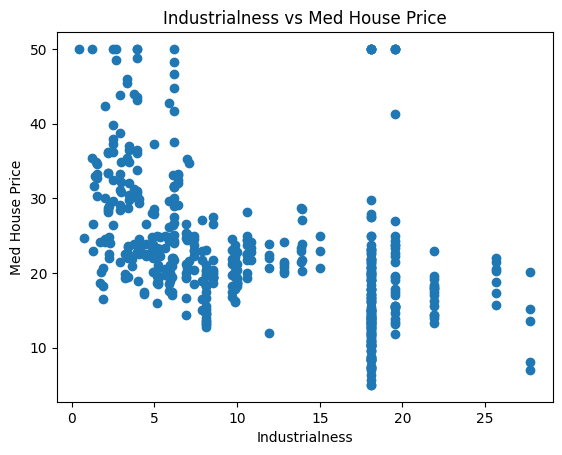

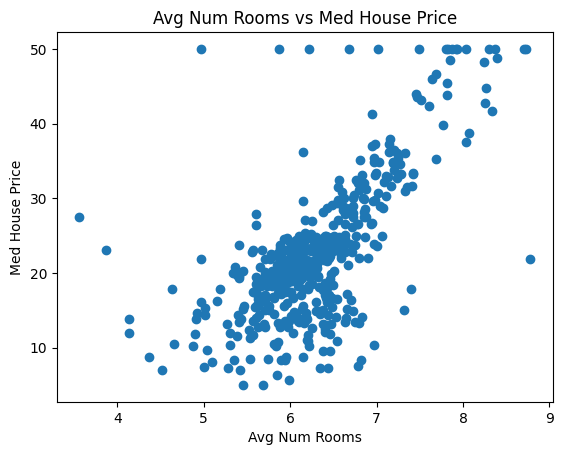

In [7]:
plt.title('Industrialness vs Med House Price')
plt.scatter(d2[:, 0], target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(d2[:, 1], target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

The loss function measures the average difference between the prediction $y$ and the actual value $t$. There are many functions of this type, one of the most popular is:

<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(y^{i}-t^{i})^2$
    
 

For linear regression of 2 variables:    
<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(w_1x_{1}^{i}+w_2x_{2}^{i}+w_0-t^{i})^2$

In [8]:
# exercise 1

def loss_function(w1, w2, w0, X, t):
    n_obs = len(X)
    sum = 0

    for i in range(n_obs):  
        sum += (w1*X[i][0] + w2*X[i][1] + w0 - t[i])**2
    lf = 1/(2*n_obs) * sum

    return lf


In [9]:
loss_function(3, 8, -1, d2, target)

2088.9192750474317

In [10]:
#example2
loss_function(-0.5, 8, -23, d2, target) #better

20.61716585276679

<h4> Exercise1: Complete the content of the above function.

Usually, at the beginning we do not have information what the parameters of the model should be; we can start with random values. So the question arises how to update them so that the loss function values are getting smaller and smaller? One of the most popular approaches (and the basis for other algorithms) is based on the Gradient Descent method. We calculate the derivative of the cost function on the considered parameters and then update them according to:

<center> 
$w_{new} = w_{old} - \alpha \cdot \frac{d LF}{dw}$

$LF(y,t) = \frac{1}{2N}\sum_{i}(w_1x_{1}^{i}+w_2x_{2}^{i}+w_0-t^{i})^2$

$\frac{d LF}{dw} = \frac{1}{N}\sum_{i}(w_1x_{1}^{i}+w_2x_{2}^{i}+w_0-t^{i})$

....

In [11]:
def update_weights(w1, w2, w0, X, t, alpha):

    # N
    n_obs = len(X)

    # loss function derivative for w1
    sum = 0
    for i in range(n_obs):  
        sum += (w1*X[i][0] + w2*X[i][1] + w0 - t[i])*X[i][0]  
    ln_d_w1 = 1/n_obs*sum
    w1_new = w1 - alpha*ln_d_w1

    # loss function derivative for w2
    sum = 0
    for i in range(n_obs):  
        sum += (w1*X[i][0] + w2*X[i][1] + w0 - t[i])*X[i][1] 
    ln_d_w2 = 1/n_obs*sum
    w2_new = w2 - alpha*ln_d_w2

    # loss function derivative for w0
    sum = 0
    for i in range(n_obs):  
        sum += (w1*X[i][0] + w2*X[i][1] + w0 - t[i])
    ln_d_w0 = 1/n_obs*sum
    w0_new = w0 - alpha*ln_d_w0

    return w1_new, w2_new, w0_new

In [12]:
update_weights(3, 8, -1, d2, target, 0.001)

(2.1737704910276685, 7.628145982577075, -1.060154604743083)

In [13]:
#example 
update_weights(3, 8, -1, d2, target, 0.001)

(2.1737704910276685, 7.628145982577075, -1.060154604743083)

<h4> Exercise2: Complete the content of the above function.

<h4> Exercise3: The goal is to build a linear regression model predicting $target$ based on $d2$. Start with the initial parameters 1, 1 and 1. Assuming $\alpha=0.001$, do 1000 updates of these parameters based on the gradient method. Draw the dependence of the cost function on the number of iterations. Perform analogous calculations for $\alpha=0.01$ and $\alpha=0.00001$. Comment your results

In [49]:
its = list(range(1000))

In [45]:
# exercise 3 - α=0.1

w0_old = w1_old = w2_old = w1 = w2 = w0 = 1

alpha = 0.1

iterations = 1000

for i in range(iterations):
    w1, w2, w0 = update_weights(w1, w2, w0, d2, target, alpha)

print(w1, w2, w0)

<ipython-input-8-d2f20addee64>:7: RuntimeWarning: overflow encountered in double_scalars
  sum += (w1*X[i][0] + w2*X[i][1] + w0 - t[i])**2
<ipython-input-11-bbbb8c3de09b>:9: RuntimeWarning: overflow encountered in double_scalars
  sum += (w1*X[i][0] + w2*X[i][1] + w0 - t[i])*X[i][0]
<ipython-input-11-bbbb8c3de09b>:11: RuntimeWarning: invalid value encountered in double_scalars
  w1_new = w1 - alpha*ln_d_w1


nan nan nan


In [53]:
# exercise 3 - α=0.01

lf_values = []

w0_old = w1_old = w2_old = w1 = w2 = w0 = 1

alpha = 0.01

iterations = 1000

for i in range(iterations):
    w1, w2, w0 = update_weights(w1, w2, w0, d2, target, alpha)
    lf = loss_function(w1, w2, w0, d2, target)
    lf_values.append(lf)

print(w1, w2, w0)

189.23801606437337 85.4860327498343 12.549821709958701


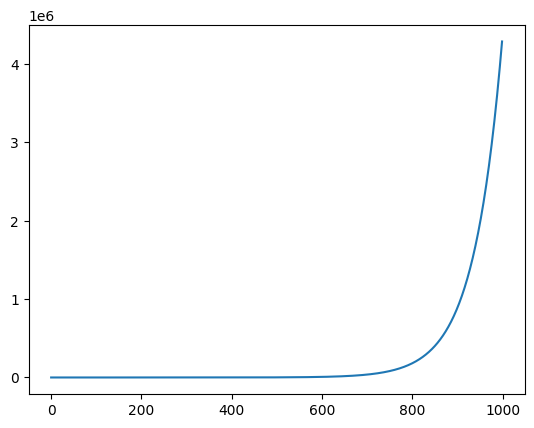

In [54]:
plt.plot(its, lf_values)

In [55]:
# exercise 3 - α=0.001

lf_values = []

w0_old = w1_old = w2_old = w1 = w2 = w0 = 1

alpha = 0.001

iterations = 1000

for i in range(iterations):
    w1, w2, w0 = update_weights(w1, w2, w0, d2, target, alpha)
    lf = loss_function(w1, w2, w0, d2, target)
    lf_values.append(lf)

print(w1, w2, w0)

-0.5240516597773193 4.3480921568559605 1.2535642605913597


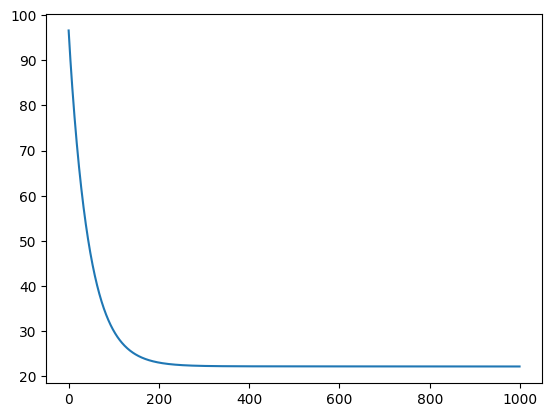

In [56]:
plt.plot(its, lf_values)

In [57]:
# exercise 3 - α=0.00001

lf_values = []

w0_old = w1_old = w2_old = w1 = w2 = w0 = 1

alpha = 0.00001

iterations = 1000

for i in range(iterations):
    w1, w2, w0 = update_weights(w1, w2, w0, d2, target, alpha)
    lf = loss_function(w1, w2, w0, d2, target)
    lf_values.append(lf)

print(w1, w2, w0)

0.7876743224351483 1.3296083328779649 1.043574995600172


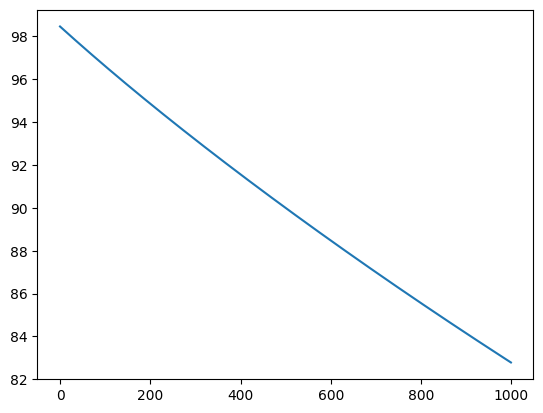

In [58]:
plt.plot(its, lf_values)

the alpha determines the step between each iteration,

so it can't be too big otherwise you miss the minimum value and not converge

but it also cannot be too small or it takes too much iterations, 
being computationally heavy to run

my interpretation of the graphs is that for alpha = 0.01, loss function increases overtime which is not what we want, we want less loss

apparently, for alpha = 0.00001 the loss decreases but it takes more iterations to do so, as for alpha = 0.001 the decrease is faster

<h4> Exercise4: We usually don't know in advance how many times we need to modify the weights - when further updating has no effect. One solution to this problem is to check by what percentage the current weights change. Let's assume that if the change in the cost function is less than 0.1%, we stop the operation. How many steps should be taken to complete the previous task?

In [19]:
# exercise 4

w1 = w2 = w0 = 1
alpha = 0.01
error = 0.001
i = 0
test = False

while test == False:
    w0_old = w1
    w2_old = w2
    w1_old = w1

    w1, w2, w0 = update_weights(w1, w2, w0, d2, target, alpha)
    test = (w1/w1_old < error) and (w2/w2_old < error) and (w0/w0_old < error)
    i += 1

print(w1, w2, w0)

-11.108584789792182 -0.007922022844285337 -0.5845873456399128


In [20]:
i

637

Obviously, there is an implementation of the linear regression method in Python

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model.fit(d2, target);

In [23]:
model.coef_ #weights for variables

array([-0.33471389,  7.82205511])

In [24]:
model.intercept_ #w0 parameter

-22.89831572922507

<h4> Exercise5: Compare these parameters with those obtained from Exercise3. Try to explain the observed discrepnacies.

alpha = 0.01

w1: 189.23801606437337, w2: 85.4860327498343, w0: 12.549821709958701


alpha = 0.001

w1: -0.5240516597773193, w2: 4.3480921568559605, w0: 1.2535642605913597


alpha = 0.00001

w1: 0.7876743224351483, w2: 1.3296083328779649, w0: 1.043574995600172


library model

w1: -0.33471389, w2:  7.82205511, w0: -22.89831572922507

they are all pretty different but I believe that for this case, alpha = 0.001 works better, it is a bit more similiar to the library model than the others


In [25]:
r_sq = model.score(d2, target) #R2 for model
print(r_sq) 

0.5362984005856312


In [26]:
y_pred = model.predict(d2) #predictions
print(y_pred[:5])

[27.75850755 24.96067296 30.93672306 31.11074967 32.27623588]


<h3> What if the dependence is not linear?

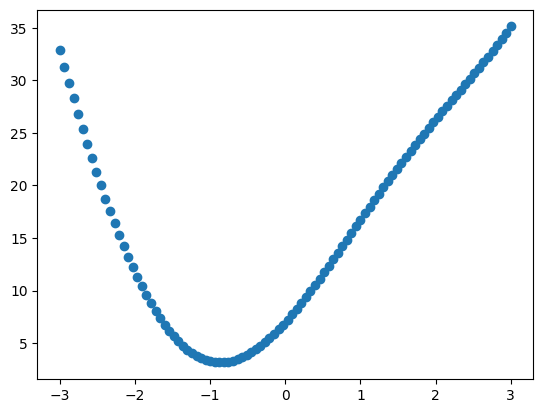

In [27]:
def non_linear(x):
    return 3*x**2+8*np.sin(x)+7

x = np.linspace(-3,3,100) #100 numbers from the [-3,3] range
y = non_linear(x)

plt.scatter(x,y)
plt.show()

In [28]:
# x1 = x**2
# x2 = np.sin(x)
# X = np.vstack((x1, x2)).T #make a 2D table
# target = y

In [29]:
# w1 = 1
# w2 = 1
# w0 = 1

# l = []

# # for i in range(10000):
# #     l.append(loss_function(w1, w2, w0, X, target))
# #     w1, w2, w0 = update_weigths(w1, w2, w0, X, target, 0.001)

In [30]:
w1, w2, w0

(-11.108584789792182, -0.007922022844285337, -0.5845873456399128)

Conclusion: The linear method can also be used for non-linear relations.

<h3> Model parameters vs. hyperparameters


- model parameters ($w_1, w_2, w_0$)
- hyperparameters (e.g. $\alpha$) are external to the model

We usually divide the data into 2 or 3 groups - a training set, a validation set and a test set.

Generally:
- On the training set, we teach the model parameters using the gradient descent method.
- Using the validation set, we select the most optimal hyperparameters.
- We check the selected set of parameters and hyperparameters on the test set

<h4> Exercise6: Consider again the data $d2/target$.
    
- Divide them into three subsets - training (60%), validation (20%) and test (20%); define the appropriate in-built function for such as task.
- Test different values of $\alpha$ parameters on the validation set, on this basis choose one that you will use to train the model parameters on the training set.
- Finally, evaluate the cost function on the test set. Comment your results.

In [31]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(d2, target, test_size=0.4, random_state=42)

X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [32]:
# choosing alpha value

alphas = [0.1, 0.01, 0.001, 0.00001, 0.0000001]

weights = np.zeros((len(alphas), 3))

for idx in range(len(alphas)):    

    w1 = w2 = w0 = 1

    it = 1000
    i = 0
    test = False
    error = 0.001

    while i <= it and test == False:

        w0_old = w1
        w2_old = w2
        w1_old = w1
        
        w1, w2, w0 = update_weights(w1, w2, w0, X_valid, y_valid, alphas[idx])

        test = (w1/w1_old < error) and (w2/w2_old < error) and (w0/w0_old < error)

        i += 1

    weights[idx]=[w1, w2, w0]

In [33]:
weights

array([[-1.05803727e+03, -4.38008273e+02, -7.10730852e+01],
       [ 1.03823939e+01,  9.03236054e+00,  1.81228292e+00],
       [-6.15511387e-01,  4.40543650e+00,  1.23481340e+00],
       [ 7.24194192e-01,  1.29019619e+00,  1.03864703e+00],
       [ 9.95477610e-01,  1.00237901e+00,  1.00029744e+00]])

as alpha decreases we see that the weights values have a tendency

I will choose the lowest two alphas to check score and time

In [34]:
#%%time
import time
start = time.time()

# checking alpha = 1e-7

w1_1 = w2_1 = w0_1 = 1
alpha_1 = 0.0000001

test = False
error = 0.001

i = 0
it = 1100

while test == False and i <= it:
    w0_old_1 = w1_1
    w2_old_1 = w2_1
    w1_old_1 = w1_1

    w1_1, w2_1, w0_1 = update_weights(w1_1, w2_1, w0_1, X_train, y_train, alpha)
    test = (w1_1/w1_old_1 < error) and (w2_1/w2_old_1 < error) and (w0_1/w0_old_1 < error)
    i += 1

total_1 = time.time() - start

In [35]:
y_pred = []

for i in range(len(X_test)):
    y_pred.append(round(X_test[i][0]*w1_1 + X_test[i][1]*w2_1 + w0_1, 3))

num = 0
denom = 0

avg = np.mean(y_test)

for i in range(len(y_test)):
    num += (y_pred[i]-avg)**2
    denom += (y_test[i]-avg)**2

r_1 = num/denom

r_1

0.40800312179878745

In [36]:
#%%time

# checking alpha = 1e-9

start = time.time()

w1_2 = w2_2 = w0_2 = 1
alpha_2 = 0.000000001

test = False
error = 0.001

i = 0
it = 1100

while test == False and i <= it:
    w0_old_2 = w1_2
    w2_old_2 = w2_2
    w1_old_2 = w1_2

    w1_2, w2_2, w0_2 = update_weights(w1_2, w2_2, w0_2, X_train, y_train, alpha)
    test = (w1_2/w1_old_2 < error) and (w2_2/w2_old_2 < error) and (w0_2/w0_old_2 < error)
    i += 1

total_2 = time.time() - start

In [37]:
y_pred = []

for i in range(len(X_test)):
    y_pred.append(round(X_test[i][0]*w1_2 + X_test[i][1]*w2_2 + w0_2,3))

num = 0
denom = 0

avg = np.mean(y_test)

for i in range(len(y_test)):
    num += (y_pred[i]-avg)**2
    denom += (y_test[i]-avg)**2

r_2 = num/denom

r_2

0.40800312179878745

In [38]:
print('alpha \t\t time(ms) \t r2 score \n')

print("%s \t %f \t %f \n" % ("{:e}".format(alpha_1), total_1, round(r_1, 3)))

print('%s \t %f \t %f \n' % ("{:e}".format(alpha_2), total_2, round(r_2, 3)))

# since there was not much difference in scores,
# I believe 1e-07 is enough

alpha 		 time(ms) 	 r2 score 

1.000000e-07 	 2.284078 	 0.408000 

1.000000e-09 	 2.620114 	 0.408000 



since the scores are similar and the time increases a bit,
I believe it would be ok to use 1e-7 in this case

<h3> Supplementary materials

In [39]:
#pandas and standarization (x-mean)/sd

import pandas as pd
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = pd.DataFrame({"a":[1,2,6], "b":[0,5,-5]})
print(X)
print()
scaledX = scale.fit_transform(X)
print(scaledX)

   a  b
0  1  0
1  2  5
2  6 -5

[[-0.9258201   0.        ]
 [-0.46291005  1.22474487]
 [ 1.38873015 -1.22474487]]


In [40]:
#compare with the previous cell
v = np.array([1,2,6])
print((v - np.mean(v))/np.std(v))

[-0.9258201  -0.46291005  1.38873015]


In [41]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
print(X)
print()
print(list(y))
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

[0, 1, 2, 3, 4]

[[4 5]
 [0 1]
 [6 7]]

[[2 3]
 [8 9]]

[2, 0, 3]

[1, 4]
